# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Background

Running a used car dealership is a very competetive market space to be in. 
In order to compete with other dealerships we will leverage the capabilities of data mining to determine the best price and what custmers care the most when purchasing used cars.


#### Business Objectives

To address the business problem of identifying key drivers for used car prices, we will frame this as a supervised machine learning task. Specifically, we aim to develop a predictive model where the target variable is the price of a used car. Key predictors (features) will include vehicle attributes such as make, model, year, mileage, condition, and engine type. 

The goal is to analyze historical sales data to uncover relationships between these features and pricing, enabling dealerships to optimize pricing strategies and making well-informed decisions on managing inventory.

#### Success Criteria

Provide better insight on pricing that inventory and ultimately lead to increase in sales and higher customer satisfaction.

#### Inventory of Resources

Available dataset for 426k used cars - ./data/vehicles.csv

Data Engineer: Christian Fajardo

Learning Facilitator: Aravind Reddy Dudipala

Hardware: Macbook Pro 15 inch M2 2023

Software: MacOSX, Python, Anaconda, Scikit Learn, Plotly, Seaborn

#### Data Mining Goal and Success Criteria

Goal: Well-informed inventory management and increase in used car sales.

Note: As this is a fictitious business / client, the success is not measurable.

#### Project Plan

- Business understanding and and requirement (see Business Understanding)
- Data understanding and intial analysis
- Identify models, identify best candidate
- Validate model with avaliable used car dataset
- Provide clear answers to the client what buyers care the most when buying used cars

Input Data:
- ./data/vehicles.csv
- 426k iused cars

Tools and techniques include:
- CRISP-DM methodology
- Python, Scikit Learn, Seaborn, Plotly
  - May include but not limited to:
    - Sequencial Feature Selection
    - PCA
    - Linear and Ridge models
    - GridSearchCV, Pipes

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures

pd.set_option('display.max_columns', None)

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Dataset Acquired
- Available dataset: ./data/vehicles.csv

In [65]:
df = pd.read_csv('./data/vehicles.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [66]:
df.shape

(426880, 18)

In [67]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [68]:
df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


#### Initial Analysis

In [69]:
def plot_count(x, y, xlabel, figsize=(15, 6), rotation=90):
    count_data = df.groupby(x)['id'].count().reset_index()
    count_data.columns = [x, 'count']
    print(count_data)
    
    plt.figure(figsize=figsize)
    sns.barplot(data=count_data, x=x, y=y)
    plt.xticks(rotation=rotation)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.title('Number of Cars by ' + xlabel)
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

**Manufacturer**

       manufacturer  count
0             acura   5978
1        alfa-romeo    897
2      aston-martin     24
3              audi   7573
4               bmw  14699
5             buick   5501
6          cadillac   6953
7         chevrolet  55064
8          chrysler   6031
9            datsun     63
10            dodge  13707
11          ferrari     95
12             fiat    792
13             ford  70985
14              gmc  16785
15  harley-davidson    153
16            honda  21269
17          hyundai  10338
18         infiniti   4802
19           jaguar   1946
20             jeep  19014
21              kia   8457
22       land rover     21
23            lexus   8200
24          lincoln   4220
25            mazda   5427
26    mercedes-benz  11817
27          mercury   1184
28             mini   2376
29       mitsubishi   3292
30           morgan      3
31           nissan  19067
32          pontiac   2288
33          porsche   1384
34              ram  18342
35            rover   2113
3

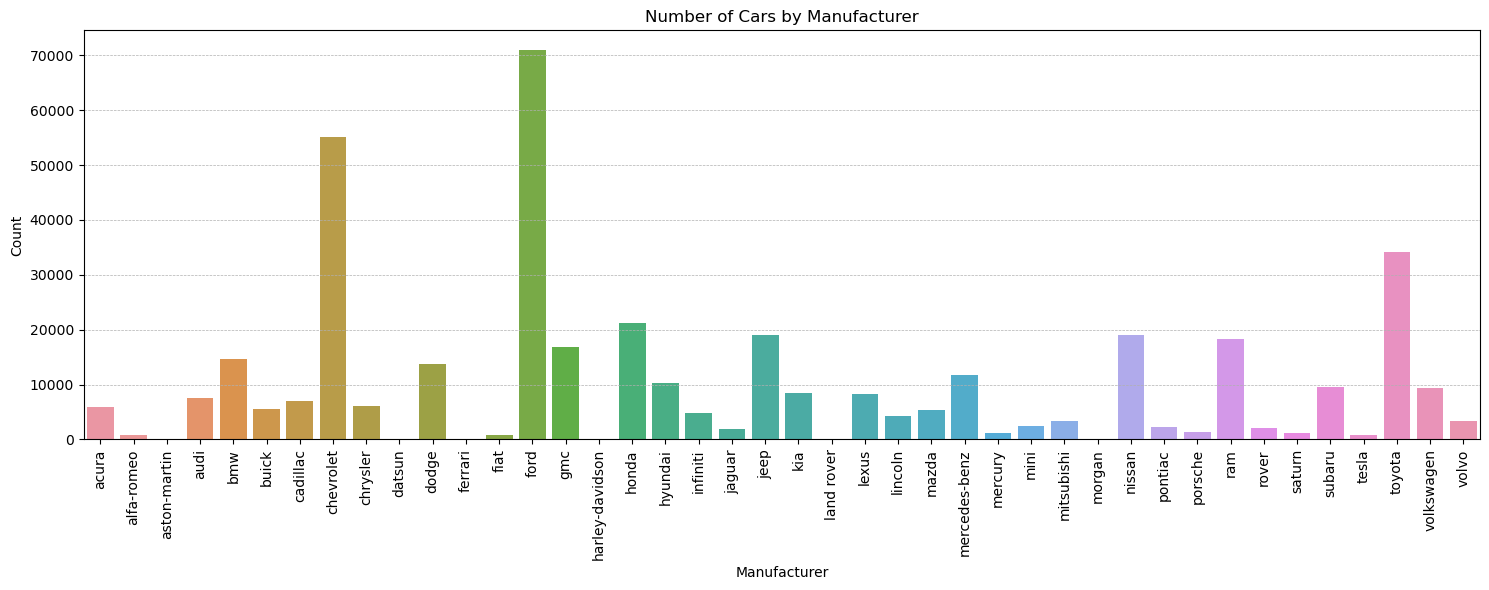

In [70]:
plot_count(
    x='manufacturer',
    y='count',
    xlabel='Manufacturer',
    figsize=(15, 6),
    rotation=90
)

The _manufacturing_ counts dataset above shows the top 3 brands are `chevrolet`, `ford` and `toyota`.

**Condition**

   condition   count
0  excellent  101467
1       fair    6769
2       good  121456
3   like new   21178
4        new    1305
5    salvage     601


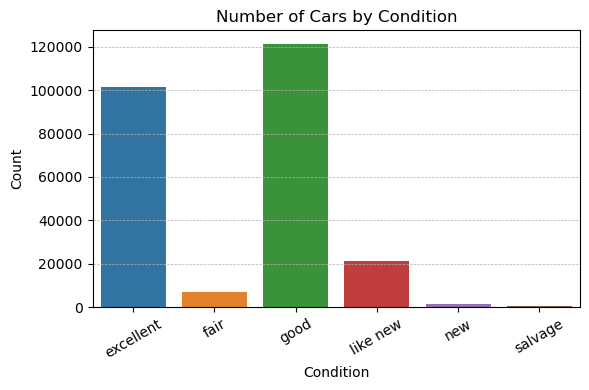

In [71]:
plot_count(
    x='condition',
    y='count',
    xlabel='Condition',
    figsize=(6, 4),
    rotation=30
)

**Title Status**

  title_status   count
0        clean  405117
1         lien    1422
2      missing     814
3   parts only     198
4      rebuilt    7219
5      salvage    3868


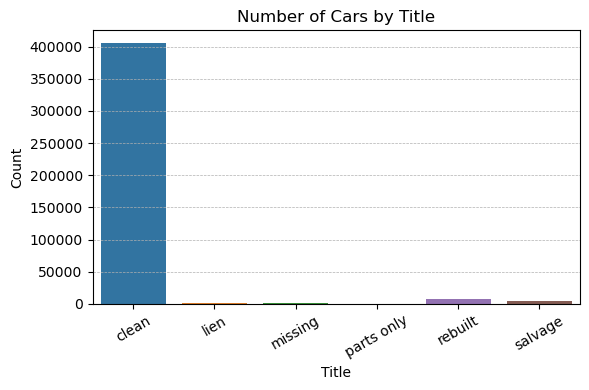

In [72]:
plot_count(
    x='title_status',
    y='count',
    xlabel='Title',
    figsize=(6, 4),
    rotation=30
)

The _title_ dataset above shows some outliers can be excluded before bulding the model.

For example: `missing`, `parts only` can be excluded.

The _title_ count dataset also shows the majority of the used cars have a `clean` title.

**Number of Cylinders**

      cylinders  count
0  10 cylinders   1455
1  12 cylinders    209
2   3 cylinders    655
3   4 cylinders  77642
4   5 cylinders   1712
5   6 cylinders  94169
6   8 cylinders  72062
7         other   1298


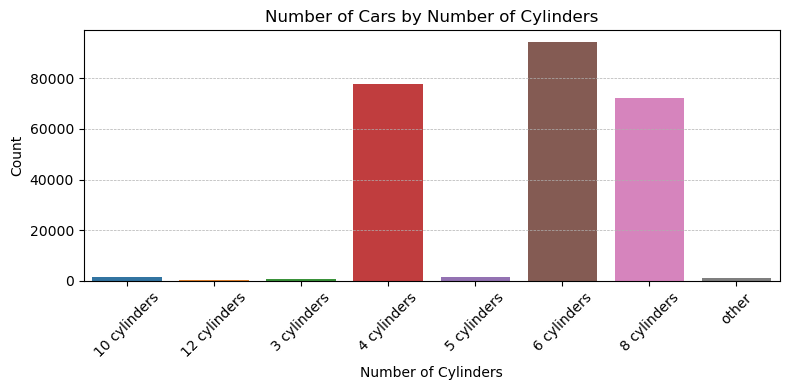

In [73]:
plot_count(
    x='cylinders',
    y='count',
    xlabel='Number of Cylinders',
    figsize=(8, 4),
    rotation=45
)

The _cylinders_ dataset counts plot shows 3 major cylinder counts - 4, 6 and 8.

**Fuel Type**

       fuel   count
0    diesel   30062
1  electric    1698
2       gas  356209
3    hybrid    5170
4     other   30728


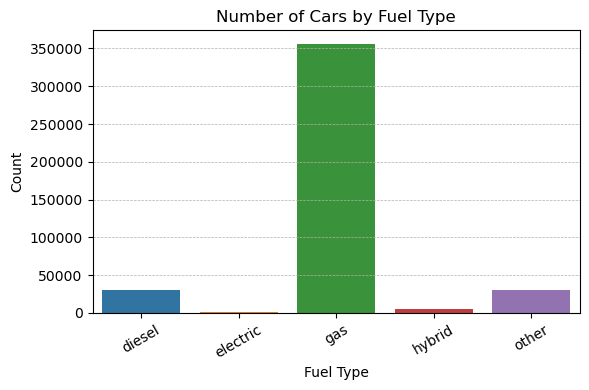

In [74]:
plot_count(
    x='fuel',
    y='count',
    xlabel='Fuel Type',
    figsize=(6, 4),
    rotation=30
)

The _fuel_ dataset count shows the majority of the cars `gas` fuel type.

**Transmission Type**

  transmission   count
0    automatic  336524
1       manual   25118
2        other   62682


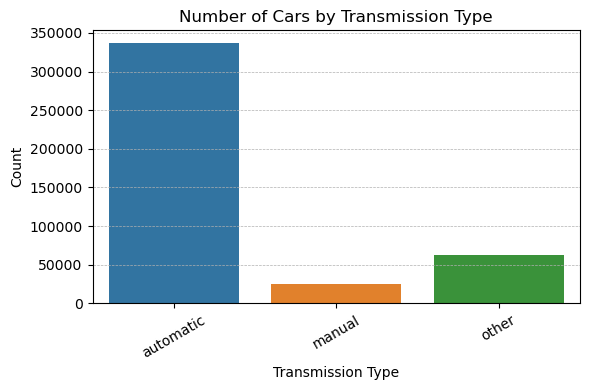

In [75]:
plot_count(
    x='transmission',
    y='count',
    xlabel='Transmission Type',
    figsize=(6, 4),
    rotation=30
)

The _transmission_ dataset count shows the majority of the cars `gas` fuel type.

**Car Type**

           type  count
0           SUV  77284
1           bus    517
2   convertible   7731
3         coupe  19204
4     hatchback  16598
5      mini-van   4825
6       offroad    609
7         other  22110
8        pickup  43510
9         sedan  87056
10        truck  35279
11          van   8548
12        wagon  10751


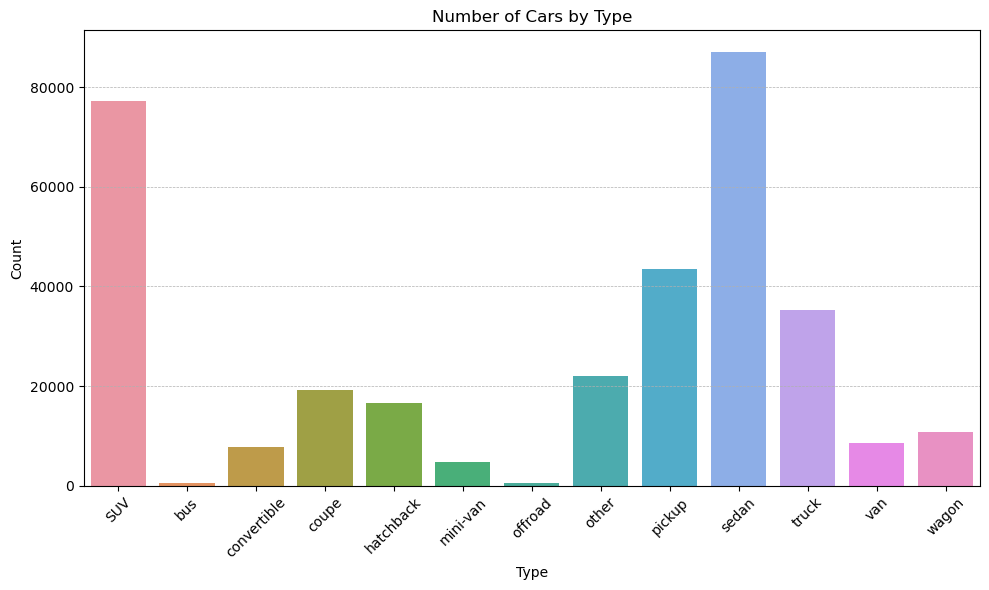

In [76]:
plot_count(
    x='type',
    y='count',
    xlabel='Type',
    figsize=(10, 6),
    rotation=45
)

The _type_ dataset count shows the top 3 types are `sedan`, `SUV` and `pickup`.

**Drive Type**

  drive   count
0   4wd  131904
1   fwd  105517
2   rwd   58892


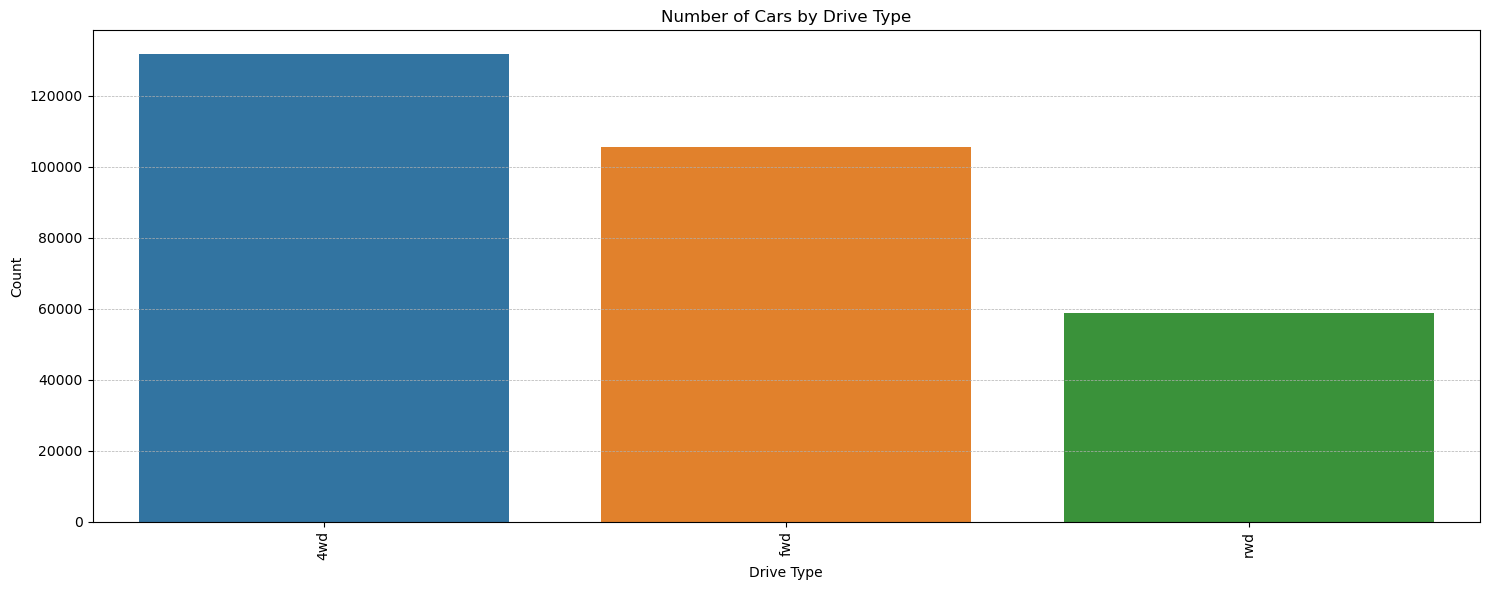

In [77]:
plot_count(
    x='drive',
    y='count',
    xlabel='Drive Type',
    figsize=(15, 6),
    rotation=90
)

**Breakdown by States**

   state  count
0     ak   3474
1     al   4955
2     ar   4038
3     az   8679
4     ca  50614
5     co  11088
6     ct   5188
7     dc   2970
8     de    949
9     fl  28511
10    ga   7003
11    hi   2964
12    ia   8632
13    id   8961
14    il  10387
15    in   5704
16    ks   6209
17    ky   4149
18    la   3196
19    ma   8174
20    md   4778
21    me   2966
22    mi  16900
23    mn   7716
24    mo   4293
25    ms   1016
26    mt   6294
27    nc  15277
28    nd    410
29    ne   1036
30    nh   2981
31    nj   9742
32    nm   4425
33    nv   3194
34    ny  19386
35    oh  17696
36    ok   6792
37    or  17104
38    pa  13753
39    ri   2320
40    sc   6327
41    sd   1302
42    tn  11066
43    tx  22945
44    ut   1150
45    va  10732
46    vt   2513
47    wa  13861
48    wi  11398
49    wv   1052
50    wy    610


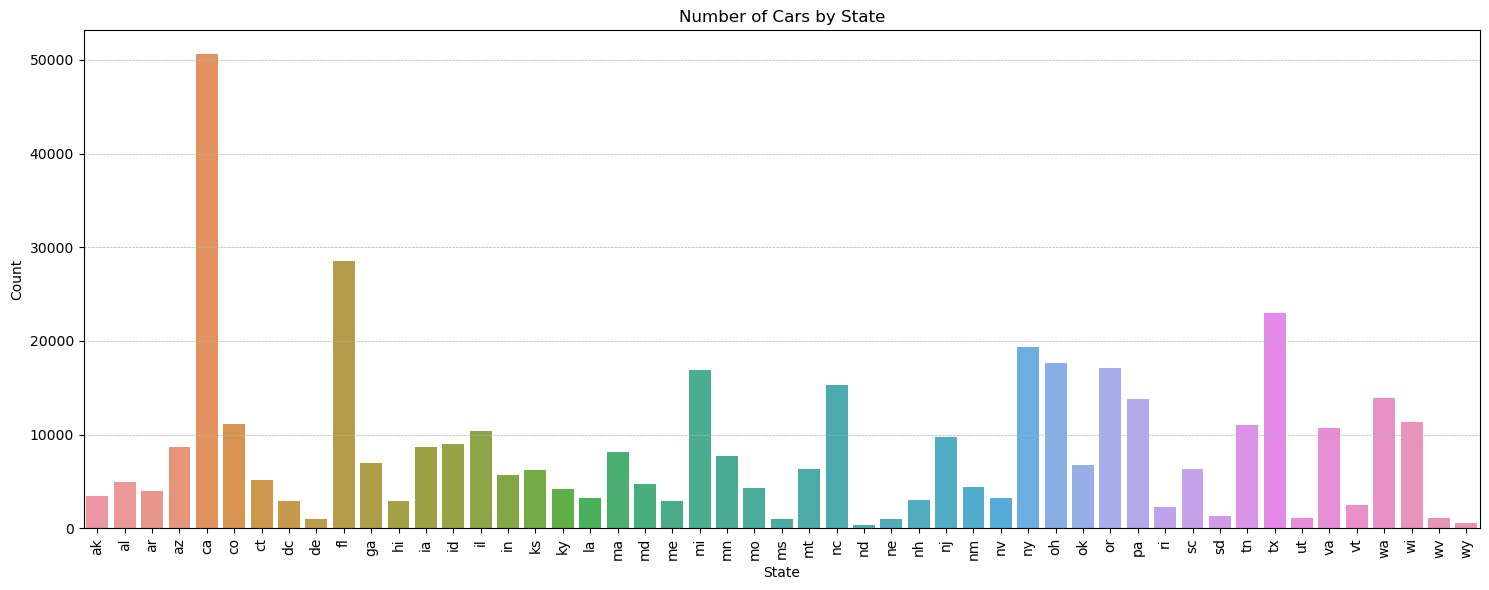

In [78]:
plot_count(
    x='state',
    y='count',
    xlabel='State',
    figsize=(15, 6),
    rotation=90
)

The _state_ dataset shows significant number of used cars in California more than all the other states.

Florida comes in second then followed by Texas.

          size  count
0      compact  19384
1    full-size  63465
2     mid-size  34476
3  sub-compact   3194


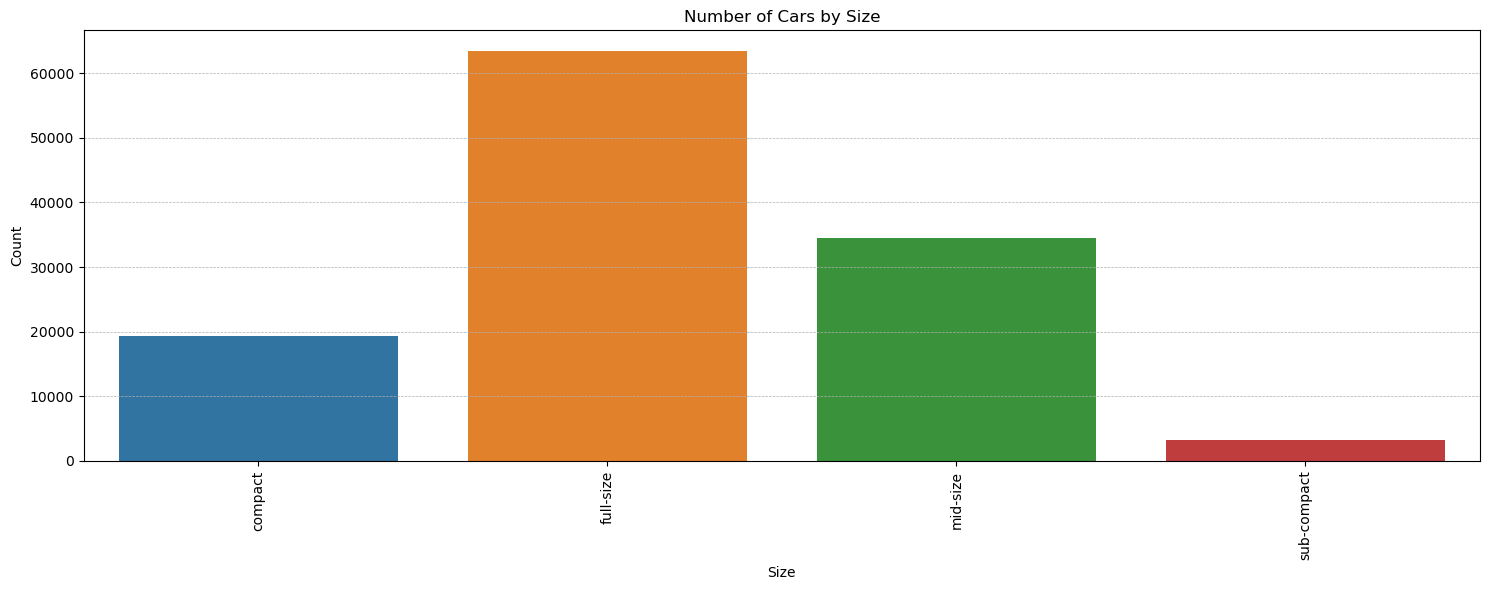

In [79]:
plot_count(
    x='size',
    y='count',
    xlabel='Size',
    figsize=(15, 6),
    rotation=90
)

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

Drop all columns that have missing values and irrelevant or modeling.

Drop `condition` as well because of both incomplete and this a subjective feature.

In [81]:
df_clean = df.drop(columns= ['id','region', 'size', 'VIN', 'paint_color', 'cylinders', 'condition', 'state', 'type', 'drive', 'model'])

In [82]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   fuel          423867 non-null  object 
 4   odometer      422480 non-null  float64
 5   title_status  418638 non-null  object 
 6   transmission  424324 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 22.8+ MB


In [83]:
df_clean.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [84]:
df_clean.head()

,price,year,manufacturer,fuel,odometer,title_status,transmission
0,6000,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df_clean.tail()

,price,year,manufacturer,fuel,odometer,title_status,transmission
426875,23590,2019.0,nissan,gas,32226.0,clean,other
426876,30590,2020.0,volvo,gas,12029.0,clean,other
426877,34990,2020.0,cadillac,diesel,4174.0,clean,other
426878,28990,2018.0,lexus,gas,30112.0,clean,other
426879,30590,2019.0,bmw,gas,22716.0,clean,other


Drop null values:

In [86]:
df_clean = df_clean.dropna().reset_index(drop=True)

Convert `year` to type int64, rename `odometer` to `mileage` and `title_status` to `title`.

In [87]:
df_clean['year'] = df_clean['year'].astype('int64')
df_clean.rename(
  columns={
    'odometer': 'mileage',
    'title_status': 'title',
    }, 
  inplace=True
)

df_clean.head()


,price,year,manufacturer,fuel,mileage,title,transmission
0,33590,2014,gmc,gas,57923.0,clean,other
1,22590,2010,chevrolet,gas,71229.0,clean,other
2,39590,2020,chevrolet,gas,19160.0,clean,other
3,30990,2017,toyota,gas,41124.0,clean,other
4,15000,2013,ford,gas,128000.0,clean,automatic


In [88]:
df_clean.shape

(394751, 7)

In [89]:
df_clean[df_clean['price'] == 0]

,price,year,manufacturer,fuel,mileage,title,transmission
19,0,2011,jeep,gas,99615.0,clean,automatic
97,0,2018,chevrolet,gas,68472.0,clean,automatic
98,0,2019,chevrolet,gas,69125.0,clean,automatic
99,0,2018,chevrolet,gas,66555.0,clean,automatic
158,0,2015,nissan,gas,99505.0,clean,automatic
...,...,...,...,...,...,...,...
394654,0,2009,toyota,hybrid,271000.0,clean,automatic
394701,0,2006,toyota,gas,195000.0,clean,automatic
394716,0,2004,toyota,hybrid,239000.0,clean,automatic
394718,0,2018,ram,diesel,20492.0,clean,automatic


Remove all outliers:

In [90]:
# deleting this due to skewing price == 0
df_clean = df_clean[df_clean['price'] != 0]

In [91]:
df_clean[df_clean['manufacturer'] == 'ferrari']

,price,year,manufacturer,fuel,mileage,title,transmission
282,98900,2001,ferrari,gas,20187.0,clean,automatic
4331,85500,2010,ferrari,other,14548.0,clean,automatic
8259,229500,2018,ferrari,gas,7910.0,salvage,automatic
13866,239995,2017,ferrari,gas,6450.0,clean,automatic
15500,239995,2017,ferrari,gas,6012.0,clean,automatic
...,...,...,...,...,...,...,...
378395,124900,2006,ferrari,other,10500.0,clean,manual
379248,185886,2011,ferrari,gas,9964.0,clean,automatic
379653,116899,2004,ferrari,gas,34123.0,clean,automatic
379809,116899,2004,ferrari,gas,34123.0,clean,automatic


In [92]:
# deleting ferrari this due to skewing price
df_clean = df_clean[df_clean['manufacturer'] != 'ferrari']

In [93]:
df_clean[df_clean['manufacturer'] == 'aston-martin']

,price,year,manufacturer,fuel,mileage,title,transmission
38385,40000,2005,aston-martin,gas,11000.0,clean,automatic
40023,179888,2018,aston-martin,gas,7800.0,clean,automatic
70086,70000,2014,aston-martin,gas,22800.0,clean,automatic
79829,52000,2010,aston-martin,gas,29970.0,clean,automatic
85751,32900,1997,aston-martin,gas,34575.0,clean,automatic
89530,42995,2006,aston-martin,gas,39648.0,clean,automatic
91393,68950,2011,aston-martin,gas,8222.0,clean,automatic
91652,69990,2011,aston-martin,gas,8222.0,clean,automatic
101514,42500,2008,aston-martin,gas,35146.0,clean,automatic
109166,119991,2014,aston-martin,gas,31067.0,clean,automatic


In [94]:
# deleting aston-martin this due to skewing price
df_clean = df_clean[df_clean['manufacturer'] != 'aston-martin']

In [95]:
df_clean[df_clean['manufacturer'] == 'datsun']

,price,year,manufacturer,fuel,mileage,title,transmission
10427,20000,1971,datsun,gas,42000.0,clean,manual
11563,19250,1972,datsun,gas,92624.0,clean,automatic
15363,10000,1980,datsun,gas,87365.0,clean,manual
20242,4500,1966,datsun,gas,100000.0,clean,manual
22866,18,1977,datsun,gas,50000.0,clean,manual
...,...,...,...,...,...,...,...
355144,18500,1971,datsun,gas,130000.0,clean,manual
357257,20000,1971,datsun,gas,42000.0,clean,manual
381254,7000,1983,datsun,gas,109000.0,clean,automatic
381794,1,1974,datsun,gas,1.0,clean,automatic


In [96]:
# deleting datsun this due to skewing price
df_clean = df_clean[df_clean['manufacturer'] != 'datsun']

In [97]:
df_clean[df_clean['manufacturer'] == 'morgan']

,price,year,manufacturer,fuel,mileage,title,transmission
167599,1800,2006,morgan,other,1000.0,clean,other
272478,36500,1958,morgan,gas,32133.0,clean,manual
309566,1000,1995,morgan,other,10000.0,clean,other


In [98]:
# deleting morgan this due to skewing price
df_clean = df_clean[df_clean['manufacturer'] != 'morgan']

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Initial test for correlation:


In [99]:
df_clean.select_dtypes(include=[float, int]).corr()[['price']]

,price
price,1.000000
year,-0.005463
mileage,0.011684


#### Split training and test data sets:

In [100]:
X, y = df_clean.drop('price', axis = 1), df_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [101]:
X.head()

,year,manufacturer,fuel,mileage,title,transmission
0,2014,gmc,gas,57923.0,clean,other
1,2010,chevrolet,gas,71229.0,clean,other
2,2020,chevrolet,gas,19160.0,clean,other
3,2017,toyota,gas,41124.0,clean,other
4,2013,ford,gas,128000.0,clean,automatic


In [102]:
y.head()

0    33590
1    22590
2    39590
3    30990
4    15000
Name: price, dtype: int64

####  Model selected - **Ridge Model**

Create categorical and numerical feature lists:

In [103]:
# These features have non-numeric data types. I will need to encode them using OneHotEndocder:
ohe_features = ['fuel', 'transmission', 'manufacturer']

# These features have very different value ranges so they will need to be scaled:
scale_features = ['year', 'mileage']


Create custom order for `title`, since we are aware of the ranking (e.g. "clean" is better than "rebuilt", "rebuilt" better than "salvage", and so on) :

In [104]:
title_categories = ['clean', 'rebuilt', 'salvage', 'lien', 'missing', 'parts only']

Create column transformer with _StandardScaler_, _OneHotEncoder_, and _OrdinalScaler_ :

In [105]:
scaler = StandardScaler()
ohe = OneHotEncoder(drop = 'if_binary', sparse_output = False, handle_unknown='ignore')
ordinal_encoder = OrdinalEncoder(categories=[title_categories])


Test encoders:

In [106]:
#from sklearn.compose import ColumnTransformer
# Define pipelines for different feature types
numerical_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures(degree=3, include_bias=False)),  # Generate polynomial features
    ('scaler', StandardScaler())  # Scale the generated features
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

ordinal_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder())  # Ordinal encode specific features
])

# Combine all pipelines into a single ColumnTransformer
transformer = make_column_transformer(
    (numerical_pipeline, make_column_selector(dtype_include=np.number)),  # Numerical features
    (ohe, ohe_features),  # Categorical features to one-hot encode
    (ordinal_encoder, ['title']),  # Features to ordinal encode
    remainder='passthrough'  # Keep remaining columns unchanged
)

X_transformed = transformer.fit_transform(X_train)
print(X_transformed[:1])
X_transformed.shape

[[ 0.19218587  0.09470535  0.19150183  0.09727221 -0.0195119   0.1907931
   0.09984923 -0.01950953 -0.01830712  0.          0.          1.
   0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.        ]]


(292357, 56)

In [107]:
X_transformed_df = pd.DataFrame(X_transformed, columns=transformer.get_feature_names_out())
X_transformed_df

,pipeline__year,pipeline__mileage,pipeline__year^2,pipeline__year mileage,pipeline__mileage^2,pipeline__year^3,pipeline__year^2 mileage,pipeline__year mileage^2,pipeline__mileage^3,onehotencoder__fuel_diesel,onehotencoder__fuel_electric,onehotencoder__fuel_gas,onehotencoder__fuel_hybrid,onehotencoder__fuel_other,onehotencoder__transmission_automatic,onehotencoder__transmission_manual,onehotencoder__transmission_other,onehotencoder__manufacturer_acura,onehotencoder__manufacturer_alfa-romeo,onehotencoder__manufacturer_audi,onehotencoder__manufacturer_bmw,onehotencoder__manufacturer_buick,onehotencoder__manufacturer_cadillac,onehotencoder__manufacturer_chevrolet,onehotencoder__manufacturer_chrysler,onehotencoder__manufacturer_dodge,onehotencoder__manufacturer_fiat,onehotencoder__manufacturer_ford,onehotencoder__manufacturer_gmc,onehotencoder__manufacturer_harley-davidson,onehotencoder__manufacturer_honda,onehotencoder__manufacturer_hyundai,onehotencoder__manufacturer_infiniti,onehotencoder__manufacturer_jaguar,onehotencoder__manufacturer_jeep,onehotencoder__manufacturer_kia,onehotencoder__manufacturer_land rover,onehotencoder__manufacturer_lexus,onehotencoder__manufacturer_lincoln,onehotencoder__manufacturer_mazda,onehotencoder__manufacturer_mercedes-benz,onehotencoder__manufacturer_mercury,onehotencoder__manufacturer_mini,onehotencoder__manufacturer_mitsubishi,onehotencoder__manufacturer_nissan,onehotencoder__manufacturer_pontiac,onehotencoder__manufacturer_porsche,onehotencoder__manufacturer_ram,onehotencoder__manufacturer_rover,onehotencoder__manufacturer_saturn,onehotencoder__manufacturer_subaru,onehotencoder__manufacturer_tesla,onehotencoder__manufacturer_toyota,onehotencoder__manufacturer_volkswagen,onehotencoder__manufacturer_volvo,ordinalencoder__title
0,0.192186,0.094705,0.191502,0.097272,-0.019512,0.190793,0.099849,-0.019510,-0.018307,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.410854,-0.174026,0.412206,-0.174785,-0.024977,0.413521,-0.175504,-0.025059,-0.018385,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.848192,-0.336960,0.854271,-0.339762,-0.026757,0.860304,-0.342506,-0.026868,-0.018398,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.791823,0.054244,-0.798953,0.053720,-0.020536,-0.806015,0.053153,-0.020581,-0.018325,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.957526,-0.313170,0.964924,-0.315479,-0.026569,0.972276,-0.317726,-0.026676,-0.018397,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292352,-0.026483,-0.499017,-0.028983,-0.504545,-0.027380,-0.031492,-0.510018,-0.027503,-0.018400,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
292353,0.192186,-0.238785,0.191502,-0.240761,-0.025823,0.190793,-0.242701,-0.025921,-0.018392,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
292354,-0.245151,-0.117340,-0.24924

Above shows the fully encoded and scaled data using our `transformer`.

Create **Ridge** instance.

In [108]:
# I use 0.10 for now for the initial model training
ridge = Ridge(alpha=0.10)

Create a **Pipeline** so I can streamline the tranformation and fitting:

In [109]:
pipe = Pipeline([
    ('transformer', transformer),
    ('ridge', ridge)
])


Initial training for the model:

In [110]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('polynomial',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15ebde890>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['fuel', 'transmission',
                                                   'manufacturer']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['clean',
                                                                              'rebuilt',
                                                                              'salvage',
                                                                              'lien',
                                                                              'missing',
                                                                              'parts '
                                                                              'only']]),
                                                  ['title'])])),
                ('ridge', Ridge(alpha=0.1))])

Get MSE:

In [111]:
p1 = pipe.predict(X_train)
p2 = pipe.predict(X_test)

train_mse = mean_squared_error(y_train, p1)
test_mse = mean_squared_error(y_test, p2)

print(train_mse)
print(test_mse)

212243370999089.34
17041709574402.994


#### Create a helper functions to extract and rank features:

In [112]:
def perform_rfe(best_pipeline, X_train, y_train, n_features_to_select, model):
    """
    Performs Recursive Feature Elimination (RFE) using the provided model
    and transformer from the pipeline to rank and select features.

    Parameters:
    - best_pipeline: The pipeline containing the transformer and model.
    - X_train: The training dataset features.
    - y_train: The training dataset target variable.
    - n_features_to_select: Number of features to select with RFE.
    - model: The model to use for RFE (e.g., Lasso, Ridge).

    Returns:
    - selected_features: List of selected feature names.
    """
    # Extract the transformer from the pipeline
    transformer = best_pipeline.named_steps['transformer']

    # Transform the training data using the transformer
    X_train_transformed = transformer.transform(X_train)

    # Get feature names after transformation
    if hasattr(transformer, 'get_feature_names_out'):
        feature_names = transformer.get_feature_names_out()
    else:
        feature_names = X_train.columns  # Use original feature names if unavailable

    # Create and fit an RFE object
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    rfe.fit(X_train_transformed, y_train)

    # Get selected features
    selected_features = [feature for feature, selected in zip(feature_names, rfe.support_) if selected]

    print("Selected Features by RFE:", selected_features)
    return rfe, selected_features


def rank_selected_features(rfe, feature_names):
    """
    Ranks the selected features from an RFE object based on their importance (absolute coefficient values).

    Parameters:
    - rfe: A fitted RFE object.
    - feature_names: List of feature names corresponding to the input data.

    Returns:
    - ranked_features: List of tuples with feature names and their coefficients, sorted by importance.
    """
    # Get the coefficients of the selected features
    selected_coefs = rfe.estimator_.coef_

    # Pair feature names with their coefficients
    selected_features_with_importance = [
        (feature, coef) for feature, selected, coef in zip(feature_names, rfe.support_, selected_coefs) if selected
    ]

    # Sort the selected features by importance (absolute value of coefficients)
    ranked_features = sorted(selected_features_with_importance, key=lambda x: abs(x[1]), reverse=True)

    # Print the ranked features
    print("Ranked Selected Features (from highest to lowest importance):")
    for feature, coef in ranked_features:
        print(f"{feature}: {coef:.4f}")

    return ranked_features



#### Find the best alpha for the model:

#### Create pipeline with `Ridge` model:

In [113]:
pipeline_ridge = Pipeline([
    ('transformer', transformer),
    ('ridge', Ridge()),
])

pipeline_ridge

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('polynomial',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15ebde890>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['fuel', 'transmission',
                                                   'manufacturer']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['clean',
                                                                              'rebuilt',
                                                                              'salvage',
                                                                              'lien',
                                                                              'missing',
                                                                              'parts '
                                                                              'only']]),
                                                  ['title'])])),
                ('ridge', Ridge())])

Create test `alphas` and grid search object:

In [114]:
param_grid = {
    'ridge__alpha': [0.1, 1, 5, 10, 50, 100, 1000]  
}

grid_search_ridge = GridSearchCV(
    estimator = pipeline_ridge,
    param_grid = param_grid,
    cv = 5,
    verbose = 1
)


Train and identify the best alpha for model:

In [115]:
grid_search_ridge.fit(X_train, y_train)

# Output the best parameters and score, this will show best alpha
print(f"Best Parameters: {grid_search_ridge.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_ridge.best_score_:.4f}")

# Evaluate the best pipeline on the test set
best_pipeline_ridge = grid_search_ridge.best_estimator_

train_score_ridge = best_pipeline_ridge.score(X_train, y_train)
test_score_ridge = best_pipeline_ridge.score(X_test, y_test)

print(f"Test Score Train: {train_score_ridge:.4f}")
print(f"Test Score: {test_score_ridge:.4f}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Parameters: {'ridge__alpha': 50}
Best Cross-Validation Score: -0.0003
Test Score Train: 0.0005
Test Score: -0.0063


Get feature names and rank them:

In [116]:
n_features_to_select = 50

rfe_ridge, feature_names_ridge = perform_rfe(
    best_pipeline=best_pipeline_ridge,
    X_train=X_train,
    y_train=y_train,
    n_features_to_select=n_features_to_select,
    model=best_pipeline_ridge.named_steps['ridge']
)

ranked_features_ridge = rank_selected_features(
    rfe=rfe_ridge,
    feature_names=feature_names_ridge
)

print(ranked_features_ridge)

Selected Features by RFE: ['pipeline__year', 'pipeline__mileage', 'pipeline__year mileage', 'pipeline__mileage^2', 'pipeline__year^3', 'pipeline__year^2 mileage', 'pipeline__year mileage^2', 'pipeline__mileage^3', 'onehotencoder__fuel_diesel', 'onehotencoder__fuel_hybrid', 'onehotencoder__fuel_other', 'onehotencoder__transmission_automatic', 'onehotencoder__transmission_manual', 'onehotencoder__transmission_other', 'onehotencoder__manufacturer_acura', 'onehotencoder__manufacturer_bmw', 'onehotencoder__manufacturer_buick', 'onehotencoder__manufacturer_cadillac', 'onehotencoder__manufacturer_chevrolet', 'onehotencoder__manufacturer_chrysler', 'onehotencoder__manufacturer_dodge', 'onehotencoder__manufacturer_fiat', 'onehotencoder__manufacturer_ford', 'onehotencoder__manufacturer_gmc', 'onehotencoder__manufacturer_harley-davidson', 'onehotencoder__manufacturer_honda', 'onehotencoder__manufacturer_hyundai', 'onehotencoder__manufacturer_infiniti', 'onehotencoder__manufacturer_jaguar', 'oneho

Create `LASSO` model:

In [58]:
transformer_lasso = make_column_transformer(
    (numerical_pipeline, make_column_selector(dtype_include=np.number)),  # Numerical features
    (ohe, ohe_features),  # Categorical features to one-hot encode
    (ordinal_encoder, ['title']),  # Features to ordinal encode
    remainder='passthrough'  # Keep remaining columns unchanged
)

The model is fine-tuned by testing different `max_iter` values and `alphas`:

In [59]:
# Define the alphas to test
alphas = [5, 10, 50, 100]

# Define pipeline
pipeline_lasso = Pipeline([
    ('transformer', transformer_lasso),
    ('pca', PCA(n_components=5, random_state = 42)),
    ('lasso', Lasso(max_iter=10000))  # Final Lasso regression step
])

# Set up GridSearchCV to tune alpha
param_grid = {
    'lasso__alpha': alphas
}

grid_search_lasso = GridSearchCV(
    estimator=pipeline_lasso,
    param_grid=param_grid,
    cv = 5,  # 5-fold cross-validation
    scoring = 'r2',  # Use R² as the evaluation metric
    verbose=1
)

# Fit the GridSearchCV
grid_search_lasso.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('polynomial',
                                                                                          PolynomialFeatures(degree=3,
                                                                                                             include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x15efcead0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop...
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['fuel',
                                                                          'transmission',
                                                                          'manufacturer']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['clean',
                                                                                                     'rebuilt',
                                                                                                     'salvage',
                                                                                                     'lien',
                                                                                                     'missing',
                                                                                                     'parts '
                                                                                                     'only']]),
                                                                         ['title'])])),
                                       ('pca',
                                        PCA(n_components=5, random_state=42)),
                                       ('lasso', Lasso(max_iter=10000))]),
             param_grid={'lasso__alpha': [5, 10, 50, 100]}, scoring='r2',
             verbose=1)

Inspect results of the Lasso model:

In [60]:
print(f"Best Alpha: {grid_search_lasso.best_params_['lasso__alpha']}")
print(f"Best Cross-Validation R²: {grid_search_lasso.best_score_:.4f}")

# Evaluate the best pipeline on the test set
best_pipeline_lasso = grid_search_lasso.best_estimator_

train_score_lasso = best_pipeline_lasso.score(X_train, y_train)
print(f"Test R²: {train_score_lasso:.4f}")

test_score_lasso = best_pipeline_lasso.score(X_test, y_test)
print(f"Test R²: {test_score_lasso:.4f}")

Best Alpha: 100
Best Cross-Validation R²: -0.0004
Test R²: 0.0002
Test R²: -0.0034


Get feature names and rank them:

In [61]:
n_features_to_select = 50

rfe_lasso, feature_names_lasso = perform_rfe(
    best_pipeline=best_pipeline_lasso,
    X_train=X_train,
    y_train=y_train,
    n_features_to_select=n_features_to_select,
    model=best_pipeline_lasso.named_steps['lasso']
)

print(feature_names_lasso)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.109e+19, tolerance: 6.209e+15
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.166e+19, tolerance: 6.209e+15
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.166e+19, toler

Selected Features by RFE: ['pipeline__mileage', 'pipeline__year mileage', 'pipeline__mileage^2', 'pipeline__year^3', 'pipeline__year^2 mileage', 'pipeline__year mileage^2', 'pipeline__mileage^3', 'onehotencoder__fuel_diesel', 'onehotencoder__fuel_electric', 'onehotencoder__fuel_gas', 'onehotencoder__fuel_hybrid', 'onehotencoder__fuel_other', 'onehotencoder__transmission_automatic', 'onehotencoder__transmission_manual', 'onehotencoder__transmission_other', 'onehotencoder__manufacturer_acura', 'onehotencoder__manufacturer_alfa-romeo', 'onehotencoder__manufacturer_audi', 'onehotencoder__manufacturer_bmw', 'onehotencoder__manufacturer_buick', 'onehotencoder__manufacturer_cadillac', 'onehotencoder__manufacturer_chevrolet', 'onehotencoder__manufacturer_chrysler', 'onehotencoder__manufacturer_dodge', 'onehotencoder__manufacturer_ford', 'onehotencoder__manufacturer_harley-davidson', 'onehotencoder__manufacturer_honda', 'onehotencoder__manufacturer_hyundai', 'onehotencoder__manufacturer_infinit

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.166e+19, tolerance: 6.209e+15
  model = cd_fast.enet_coordinate_descent(


In [62]:
ranked_features_lasso = rank_selected_features(
    rfe=rfe_lasso,
    feature_names=feature_names_lasso
)

print(ranked_features_lasso)


Ranked Selected Features (from highest to lowest importance):
pipeline__year^2 mileage: -7059872.4071
pipeline__year mileage: -5305240.7335
onehotencoder__manufacturer_mercedes-benz: 752285.7181
onehotencoder__manufacturer_volvo: 436126.9670
onehotencoder__manufacturer_toyota: 291834.1467
pipeline__mileage^3: 200157.7542
onehotencoder__manufacturer_jeep: 162090.2391
onehotencoder__fuel_hybrid: -125348.8244
onehotencoder__transmission_manual: 125099.1767
onehotencoder__manufacturer_pontiac: -109478.6804
onehotencoder__manufacturer_chevrolet: 100884.8712
ordinalencoder__title: -72014.1430
onehotencoder__manufacturer_mercury: -65003.1866
onehotencoder__transmission_other: -45821.1359
onehotencoder__fuel_other: 45183.0431
onehotencoder__fuel_diesel: 40833.9929
onehotencoder__manufacturer_volkswagen: -33801.5772
onehotencoder__manufacturer_saturn: -32959.0223
onehotencoder__manufacturer_ford: -30465.9571
onehotencoder__manufacturer_tesla: 22879.6102
onehotencoder__manufacturer_subaru: -2011

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Ridge Model

The Ridge model successfully selected a mix of polynomial features and categorical one-hot encoded variables, with `pipeline__mileage` showing the highest positive importance and `pipeline__year^2 mileage` having the highest negative impact on the target variable. Polynomial interactions like p`ipeline__mileage^2` and categorical variables such as `onehotencoder__manufacturer_mercedes-benz` were also significant contributors, highlighting the value of both numerical and categorical features in the model. While the model captures complex relationships, further evaluation on the test set and analysis of overfitting risks for high-degree polynomial terms is recommended for robust validation.

#### LASSO Model

Similar results yield from the LASSO model.

The Lasso model highlights the significant role of polynomial features, with `pipeline__year^2 mileage` and `pipeline__year mileage` contributing the largest negative impacts, indicating complex relationships between vehicle year, mileage, and the target variable. Notably, categorical features such as `onehotencoder__manufacturer_mercedes-benz` and `onehotencoder__manufacturer_volvo` emerge as important, showcasing the influence of manufacturer attributes on predictions. However, several features with zero coefficients (e.g., `onehotencoder__fuel_electric`) were effectively eliminated by Lasso's regularization, emphasizing its ability to reduce model complexity by selecting only the most relevant predictors.

#### Next Steps

Since our models yield low score values, we need to further fine-tune them.
Also, we can explore further by using `permutation_importance` as well:

- Hyperparameter Tuning:
  - Perform a grid search or randomized search for optimal alpha values for Ridge and Lasso models, using cross-validation to ensure robust performance.

- eature Selection Refinement:
  - Use RFE with different numbers of features to identify the optimal subset of predictors for each model, and evaluate the impact on performance.

- Dimensionality Reduction:
  - Apply techniques such as PCA (Principal Component Analysis) to reduce multicollinearity and explore its effect on Ridge and Lasso performance.

- Permutation Importance Exploration:
  - Compute permutation importance for the best-performing Ridge and Lasso models to validate feature relevance and identify any unexpected influential features.

- Model Validation on Test Set:
  - Use the refined models to predict on the test set and compare R² and RMSE metrics to assess generalization performance.

- Visualize Feature Importance:
  - Create bar plots of the feature importances derived from permutation importance for both Ridge and Lasso models to provide insights into which predictors drive the results.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### Deployment Plan

For this CRISP-DM project, the plan is present a comprehensive report summarizing the models’ selection process, hyperparameter tuning, feature importance insights, and deployment pipeline. Include visualizations of the models’ predictions, evaluation metrics, and a demonstration of the deployed system. Share recommendations for future model iterations and maintenance strategies.

#### Monitoring and Maintenanace

To maintain and improve the performance of the Ridge and Lasso models, it is essential to establish a continuous process for gathering incoming used car sales data. Newly acquired data should be cleaned, preprocessed, and merged with the existing dataset to expand the training and testing samples. 

This updated data can then be split into new training and test sets, ensuring that the models are trained on the most recent market trends. Fine-tuning the models should be repeated with the updated data, including hyperparameter optimization and feature selection, to capture evolving patterns. Once retrained, the models should be evaluated for performance consistency and integrated back into the deployment pipeline. 

This cyclical process ensures that the models remain accurate and relevant, adapting to changes in used car sales trends over time.

#### Final Report

Both models - Ridge and Lasso reveal that used car are inlfulenced by:
- `Year`
- `Milaeage`
- `Manufacturer`


Ridge Model Features Ranking:

- _pipeline__mileage: 5202731.3535_
- _pipeline__year^2 mileage: -5072636.5557_
- _pipeline__year mileage^2: -2289587.4045_
- _pipeline__mileage^2: 1886629.3964_
- _onehotencoder__manufacturer_mercedes-benz: 726300.4621_


LASSO Model Features Ranking:

- _pipeline__year^2 mileage: -7059872.4071_
- _pipeline__year mileage: -5305240.7335_
- _onehotencoder__manufacturer_mercedes-benz: 752285.7181_
- _onehotencoder__manufacturer_volvo: 436126.9670_
- _onehotencoder__manufacturer_toyota: 291834.1467_


The Ridge and Lasso models reveal that used car prices in the US are primarily driven by the vehicle’s year, mileage, and manufacturer. 

Feature rankings derived from Recursive Feature Elimination (RFE) consistently highlight these variables as the most influential predictors across both models. Polynomial interactions involving year and mileage further emphasize the non-linear relationship between these factors and car prices. 

The alignment of feature importance rankings between Ridge and Lasso models underscores the reliability of these insights. 

These findings provide actionable evidence for our dealership and pricing analysts, to make well-informed decision on maintaining inventory.

##### Mileage | Price

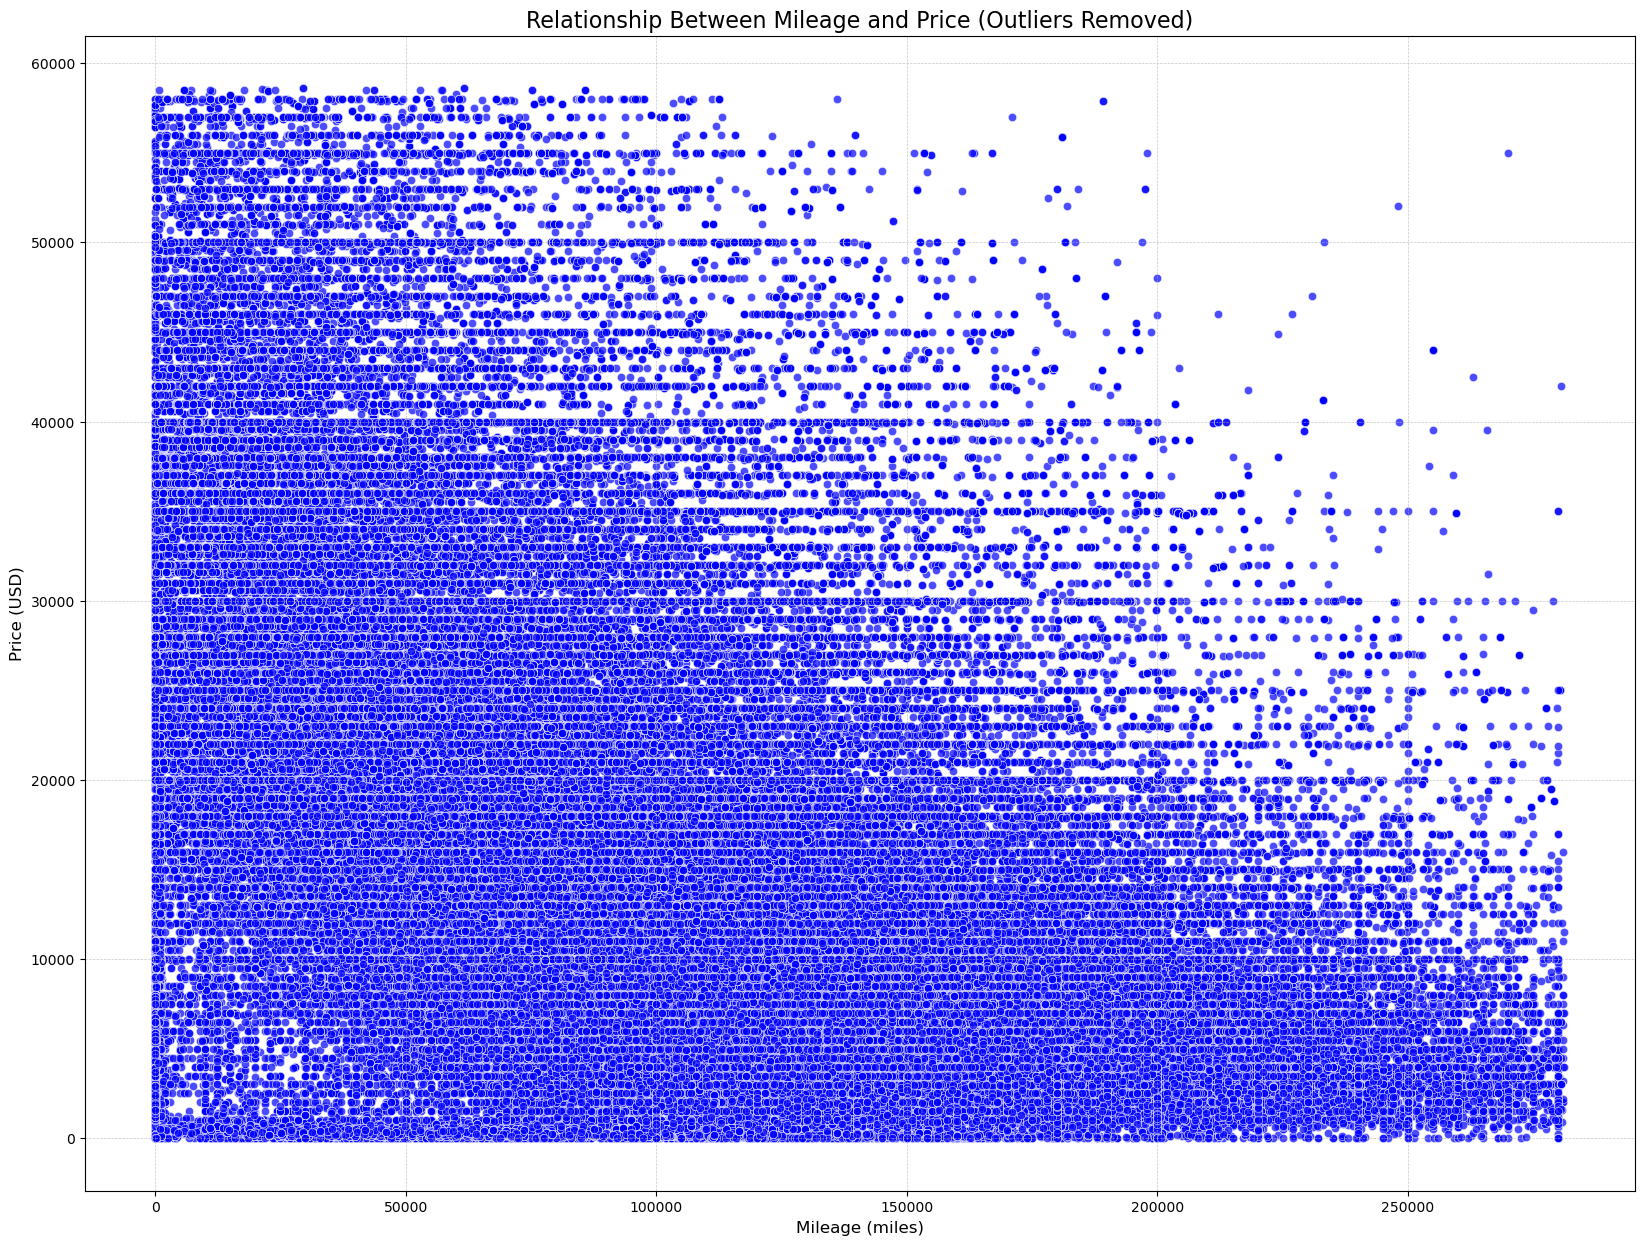

In [133]:
# Remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to both columns
df_cleaned_outliers_removed = remove_outliers_iqr(df_clean, 'mileage')
df_cleaned_plot = remove_outliers_iqr(df_cleaned_outliers_removed, 'price')

plt.figure(figsize=(20, 15))
sns.scatterplot(data=df_cleaned_plot, x='mileage', y='price', color='blue', alpha=0.7)

plt.title('Relationship Between Mileage and Price (Outliers Removed)', fontsize=16)
plt.xlabel('Mileage (miles)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()


##### Year | Price

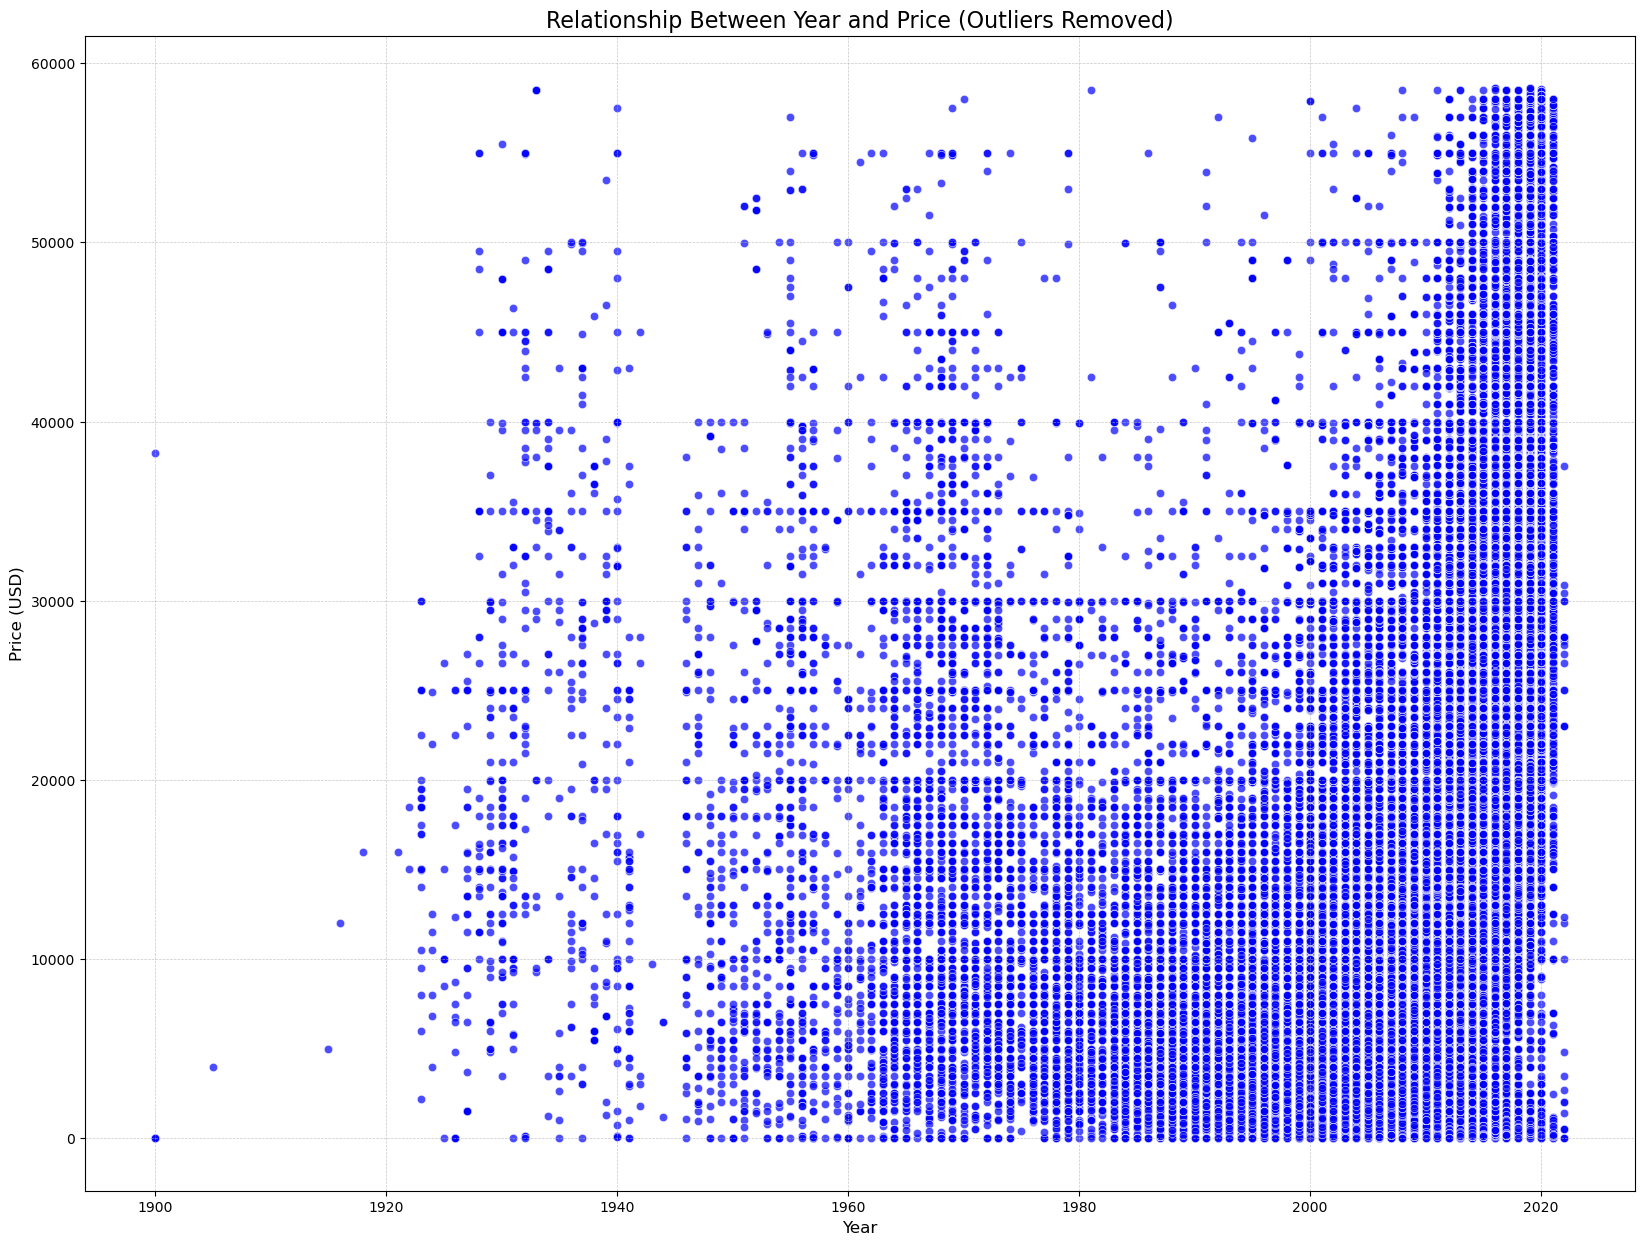

In [134]:
plt.figure(figsize=(20, 15))
sns.scatterplot(data=df_cleaned_plot, x='year', y='price', color='blue', alpha=0.7)

plt.title('Relationship Between Year and Price (Outliers Removed)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

##### Manufacturer | Price

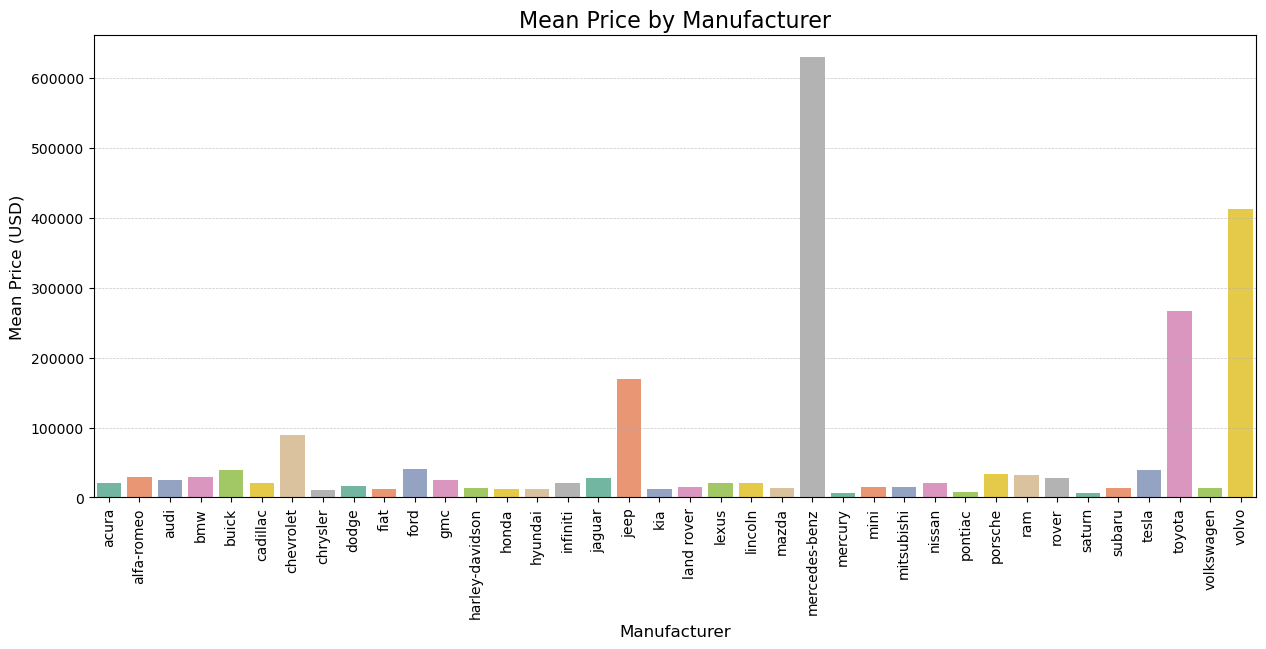

In [139]:
mean_price = df_cleaned_outliers_removed.groupby('manufacturer')['price'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=mean_price, x='manufacturer', y='price', palette='Set2')

plt.title('Mean Price by Manufacturer', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Mean Price (USD)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

#### Project Review

The Ridge and LASSO models confirm the common knowledge influencing used car prices in the US: mileage, year, and manufacturer. 

Despite the models exhibiting relatively low R² scores, they consistently highlighted these features as the most significant predictors through their feature rankings. 

The polynomial interactions involving mileage and year further emphasize the nuanced and non-linear relationship between these variables and car prices, aligning with general market observations. Additionally, the models identified specific manufacturers, such as Mercedes-Benz and Toyota, as key contributors to price variations, reflecting common industry knowledge about brand reputation. 

While the models' predictive performance was limited, their results validate the intuitive understanding of how these factors drive pricing decisions. This confirmation demonstrates the value of data-driven approaches in reinforcing existing domain knowledge. 

Moreover, it highlights the potential for iterative improvements in the modeling process to capture more complex and subtle patterns in used car pricing.
